# Prism simulation

Here we describe a very simple raytracer to simulate the effect of a prism for specular reflections.

## Prism equations

cf. [Wikipedia](https://en.wikipedia.org/wiki/Prism)

$\theta_0' = \arcsin \left(\frac{n_0}{n_1}\sin \theta_0 \right)$

$\theta_1  = \alpha-\theta_0'$

$\theta_1' = \arcsin \left(\frac{n_1}{n_2}\sin \theta_1 \right)$

$\theta_2  = \theta_1' - \alpha$

![alt text](https://upload.wikimedia.org/wikipedia/commons/7/7d/Prism_ray_trace.svg)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


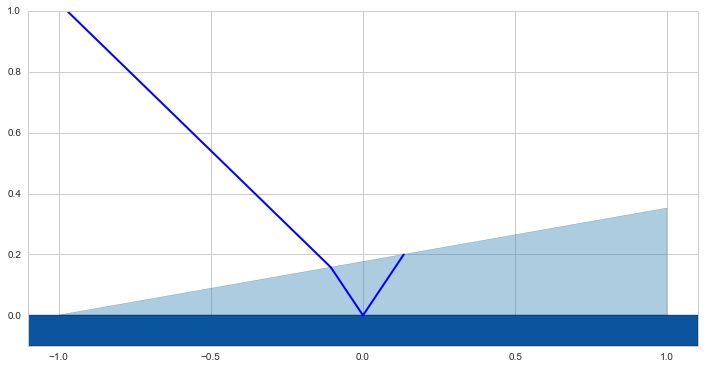

reflection angle nan
viewing angle:  -45.80466255761008
light angle:  nan


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, degrees

from ipywidgets import interact, FloatSlider

sns.set_palette('Blues_r')
sns.set_context("notebook")
sns.set_style("whitegrid")

def intersect_lines(line_0, line_1):
    #intersect two lines of the form line_i = (ai, bi) such that y = ai*x + bi
    
    a0 = line_0[0]
    b0 = line_0[1]
    a1 = line_1[0]
    b1 = line_1[1]
    
    if(a0 == a1):
        return (None, None)
    else:
        x = (b1-b0)/(a0-a1)
        y = a0*x+b0
        return(x,y)
    
def get_line_from_point_angle(p, angle):
    
    a = np.tan(angle)
    b = p[1]-a*p[0]
    return (a,b)
    

def compute_thetas_from_theta_0_prime(theta_0_prime, alpha, n1, n2):
    theta_1       = alpha-theta_0_prime
    theta_1_prime = np.arcsin(n1/n2*np.sin(theta_1))
    theta_2       = theta_1_prime-alpha
    
    return theta_1, theta_1_prime, theta_2

def evaluate_line_x(line,x):
    a = line[0]
    b = line[1]
    return a*x + b

def evaluate_line_y(line,y):
    a = line[0]
    b = line[1]
    if a == 0:
        return None
    else:
        return (y-b)/a
    
def plot_prism(theta_0_prime):
    
    #convert to radians
    theta_0_prime = radians(theta_0_prime)
    alpha = radians(10)
    n1    = 1.45
    n2    = 1.0002
    
    plt.figure(figsize=(12, 6), dpi=300)
    plt.axes()

    floor  = plt.Rectangle((-1.1, -0.1), 2.2, 0.1)
    prism  = plt.Polygon([[-1,0], [1,0], [1,2*np.tan(alpha)] ], fc='#2d82b1', alpha=0.4)
    plt.gca().add_patch(floor)
    plt.gca().add_patch(prism)
    
    # PRISM INTERFACE
    prism_line            = get_line_from_point_angle((-1, 0), alpha)
    prism_incoming_light  = get_line_from_point_angle((0, 0), np.pi/2 - theta_0_prime)
    prism_reflected_light = get_line_from_point_angle((0, 0), np.pi/2 + theta_0_prime)
    
    p0 = intersect_lines(prism_line, prism_incoming_light)
    p1 = intersect_lines(prism_line, prism_reflected_light)

    prism_incoming_light_line = plt.Line2D((0, p0[0]), (0, p0[1]), lw=2.)
    prism_reflected_light_line = plt.Line2D((0, p1[0]), (0, p1[1]), lw=2.)
    plt.gca().add_line(prism_incoming_light_line)
    plt.gca().add_line(prism_reflected_light_line)
    
    # AIR INTERFACE
    t1_0, t1p_0, t2_0 = compute_thetas_from_theta_0_prime(-theta_0_prime, alpha, n1, n2)
    t1_1, t1p_1, t2_1 = compute_thetas_from_theta_0_prime(theta_0_prime, alpha, n1, n2)
    
    air_incoming_light  = get_line_from_point_angle(p0, np.pi/2 - t2_0)
    air_reflected_light = get_line_from_point_angle(p1, np.pi/2 - t2_1)
    
    y  = 2
    q0 = (evaluate_line_y(air_incoming_light, y), y)
    q1 = (evaluate_line_y(air_reflected_light, y), y)
    
    air_incoming_light_line = plt.Line2D((p0[0], q0[0]), (p0[1], q0[1]), lw=2.)
    air_reflected_light_line = plt.Line2D((p1[0], q1[0]), (p1[1], q1[1]), lw=2.)
    plt.gca().add_line(air_incoming_light_line)
    plt.gca().add_line(air_reflected_light_line)
    
    #SURFACE REFLECTION
    mirror_angle =  t2_0 + np.pi/2+2*alpha
    air_surface_reflected_light = get_line_from_point_angle(p1, mirror_angle)
    if mirror_angle < np.pi:
        r = (evaluate_line_y(air_surface_reflected_light, y), y)
    else:
        r = (evaluate_line_y(air_surface_reflected_light, -y), -y)
    air_surface_reflected_light_line = plt.Line2D((p0[0], r[0]), (p0[1], r[1]), lw=2., c='r', alpha=0.3)
    plt.gca().add_line(air_surface_reflected_light_line)
    

    plt.axis([ -1.1,1.1,-0.1,1] )
    plt.show()
    
    print('reflection angle', degrees(t2_0 + 2*alpha) )
    print('viewing angle: ', degrees(t2_1))
    print('light angle: ', degrees(t2_0))
    
interact( plot_prism, theta_0_prime=FloatSlider(min=0., max=50., step=0.1, value=0., description='theta_i (deg)') )
    
    

In [15]:
from math import degrees, radians

def from_viewing_angle_to_theta_i(theta_2, alpha, n1, n2, deg=True):
    
    #convert to radians
    if deg:
        theta_2 = radians(theta_2)
        alpha   = radians(alpha)
    
    theta_1_prime = theta_2+alpha
    theta_1       = np.arcsin(n2/n1*np.sin(theta_1_prime))
    theta_0_prime = alpha-theta_1

    if deg:
        return degrees(theta_0_prime), degrees(theta_1_prime)
    else:
        return theta_0_prime, theta_1_prime
    
    
from_viewing_angle_to_theta_i(-10, 10, 1.45, 1.0002)
    

(10.0, 0.0)

In [10]:


arccos(0.7)/(2*np.pi)*360

45.572995999194298